In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\retail_sales_dataset.csv", encoding='ISO-8859-1')
print("Dataset Loaded:")
print(df.head())


Dataset Loaded:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  24-11-2023     CUST001    Male   34           Beauty   
1               2  27-02-2023     CUST002  Female   26         Clothing   
2               3  13-01-2023     CUST003    Male   50      Electronics   
3               4  21-05-2023     CUST004    Male   37         Clothing   
4               5  06-05-2023     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [7]:
df.dropna(subset=['Date','Total Amount'], inplace=True)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.sort_values('Date', inplace=True)

# Aggregate daily sales
sales_daily = df.groupby('Date')['Total Amount'].sum().reset_index()

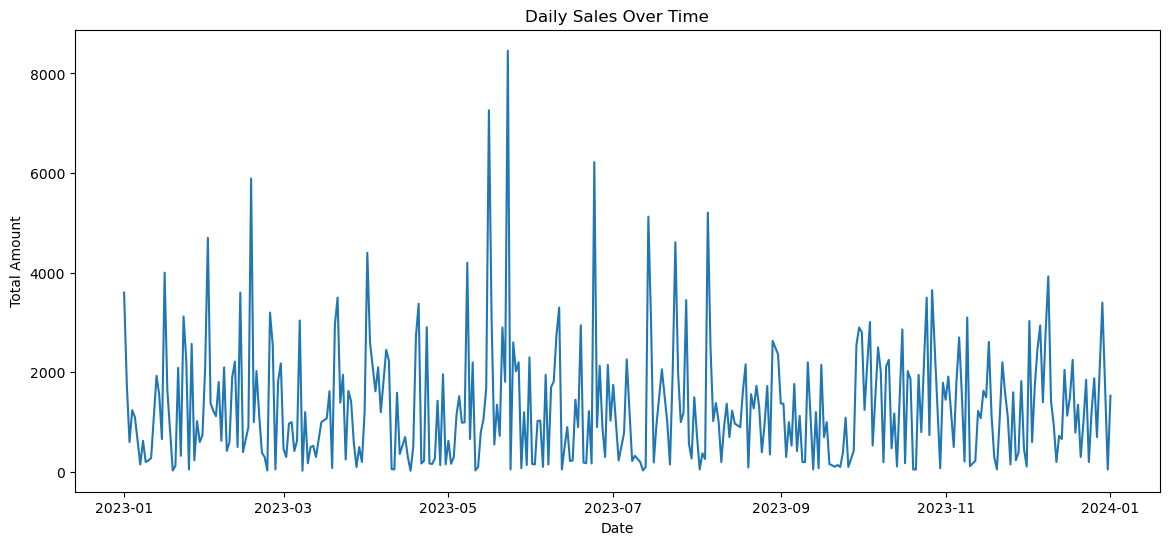

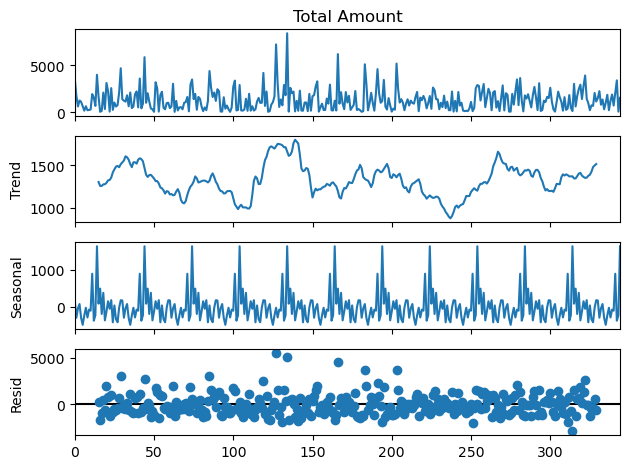

In [10]:
plt.figure(figsize=(14,6))
sns.lineplot(data=sales_daily, x='Date', y='Total Amount')
plt.title("Daily Sales Over Time")
plt.show()

# Decompose time series to see trend and seasonality
decomposition = seasonal_decompose(sales_daily['Total Amount'], model='additive', period=30)
decomposition.plot()
plt.show()

                               SARIMAX Results                                
Dep. Variable:           Total Amount   No. Observations:                  345
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2960.737
Date:                Sat, 20 Sep 2025   AIC                           5933.475
Time:                        11:53:04   BIC                           5956.519
Sample:                             0   HQIC                          5942.653
                                - 345                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7727      0.050    -15.547      0.000      -0.870      -0.675
ar.L2         -0.6090      0.069     -8.889      0.000      -0.743      -0.475
ar.L3         -0.4041      0.078     -5.163      0.0

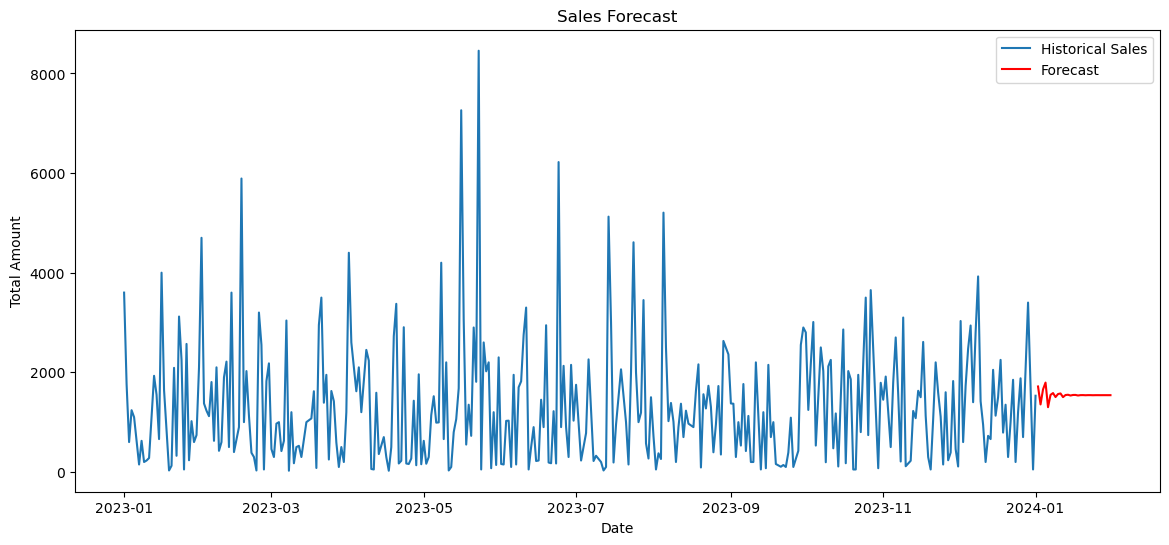

In [11]:
model = ARIMA(sales_daily['Total Amount'], order=(5,1,0))  # (p,d,q)
model_fit = model.fit()
print(model_fit.summary())

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)
forecast_dates = pd.date_range(sales_daily['Date'].max() + pd.Timedelta(days=1), periods=30)
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})

# Plot forecast
plt.figure(figsize=(14,6))
plt.plot(sales_daily['Date'], sales_daily['Total Amount'], label='Historical Sales')
plt.plot(forecast_df['Date'], forecast_df['Forecast'], label='Forecast', color='red')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.legend()
plt.show()

In [12]:
forecast_df.to_csv("Sales_Forecast.csv", index=False)
print("Forecast saved as 'Sales_Forecast.csv'")

Forecast saved as 'Sales_Forecast.csv'
